In [0]:
! pip install comet-ml

In [0]:
! git clone https://github.com/dudeperf3ct/TextRecognizer.git

In [1]:
%cd TextRecognizer/Experiment-2/notebooks

/content/TextRecognizer/Experiment-2/notebooks


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import logging
import absl.logging
logging.root.removeHandler(absl.logging._absl_handler)
absl.logging._warn_preinit_stderr = False
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [0]:
import sys
sys.path.append('..')

In [0]:
from src.data.iam_lines import IAMLines
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from collections import defaultdict

In [0]:
dataset = IAMLines()
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [7]:
print(dataset)

IAM Lines Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Input shape: (28, 952)



## EDA

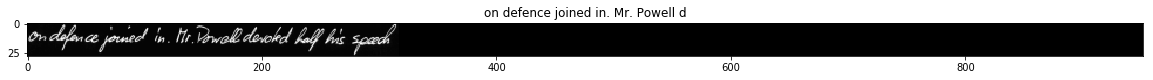

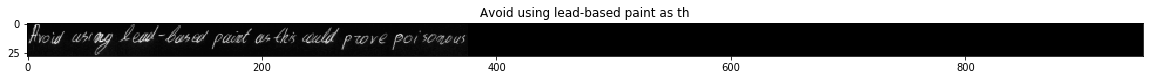

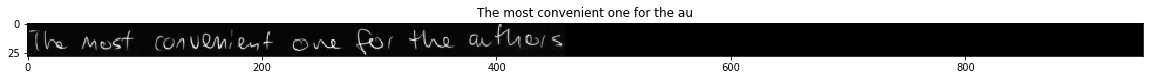

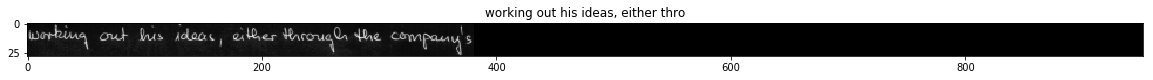

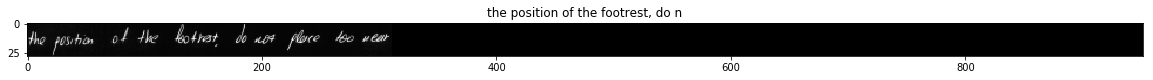

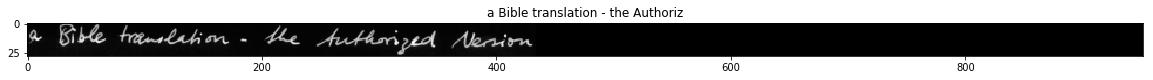

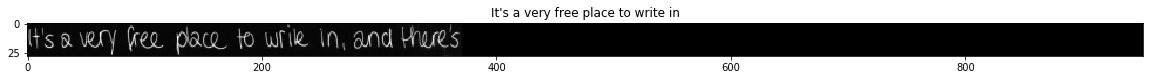

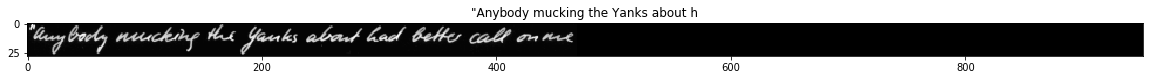

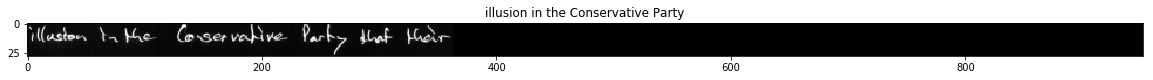

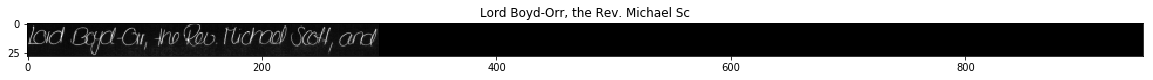

In [8]:
classes = dataset.mapping
# plot the images in the batch, along with the corresponding labels
size = 10
rnd_ind = np.random.randint(low=0, high=len(dataset.x_train), size=size)

for idx in rnd_ind:
    plt.figure(figsize=(20, 20))
    lbl = [classes[np.where(dataset.y_train[idx][i]==1)[0][0]] for i in range(34)]
    plt.title(''.join(lbl))
    plt.imshow(dataset.x_train[idx], cmap='gray')

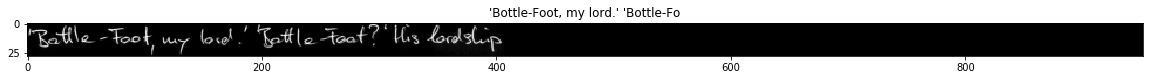

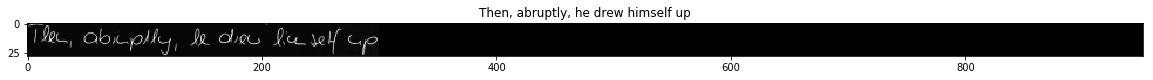

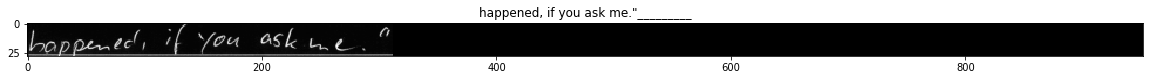

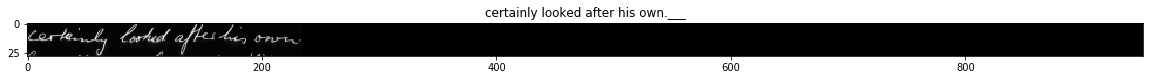

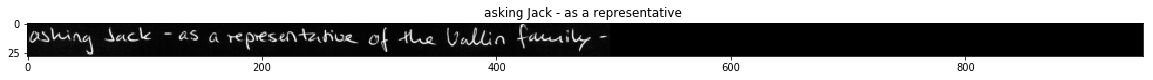

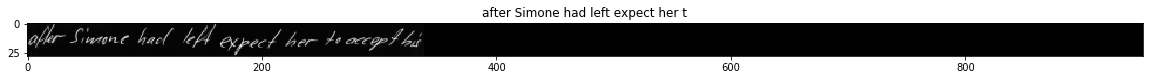

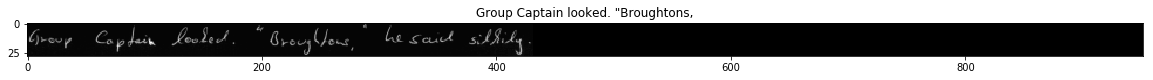

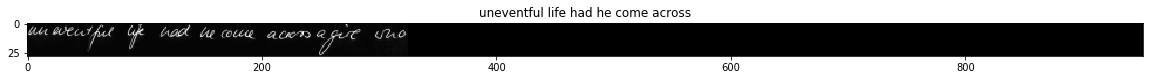

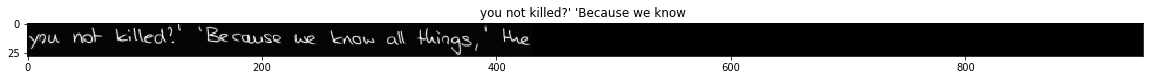

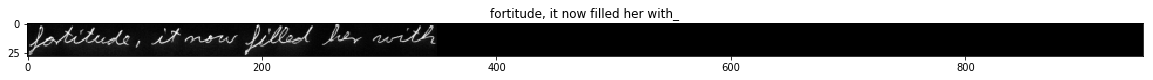

In [9]:
classes = dataset.mapping
# plot the images in the batch, along with the corresponding labels
size = 10
rnd_ind = np.random.randint(low=0, high=len(dataset.x_test), size=size)

for idx in rnd_ind:
    plt.figure(figsize=(20, 20))
    lbl = [classes[np.where(dataset.y_test[idx][i]==1)[0][0]] for i in range(34)]
    plt.title(''.join(lbl))
    plt.imshow(dataset.x_test[idx], cmap='gray')

In [0]:
def distribution(labels, classes):
    
    lbl_dist = dict.fromkeys(value for key,value in classes.items())
    lbl_dist = defaultdict(lambda:1)
    for idx in tqdm(range(len(labels))):
        lbl = [classes[np.where(dataset.y_train[idx][i]==1)[0][0]] for i in range(34)]
        for i in range(len(lbl)):
            lbl_dist[lbl[i]] += 1
    return lbl_dist

In [11]:
distribution(dataset.y_train, classes)

100%|██████████| 7101/7101 [00:00<00:00, 9550.12it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>>,
            {' ': 38486,
             '!': 78,
             '"': 520,
             '#': 42,
             '&': 30,
             "'": 545,
             '(': 127,
             ')': 98,
             '*': 2,
             '+': 2,
             ',': 2114,
             '-': 548,
             '.': 2040,
             '/': 11,
             '0': 222,
             '1': 209,
             '2': 74,
             '3': 85,
             '4': 52,
             '5': 67,
             '6': 59,
             '7': 27,
             '8': 62,
             '9': 76,
             ':': 77,
             ';': 90,
             '?': 40,
             'A': 624,
             'B': 417,
             'C': 378,
             'D': 224,
             'E': 298,
             'F': 250,
             'G': 359,
             'H': 417,
             'I': 620,
             'J': 79,
             'K': 101,
             'L': 309,
             'M': 694,
             'N': 345,
          

In [12]:
distribution(dataset.y_test, classes)

100%|██████████| 1861/1861 [00:00<00:00, 9659.33it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>>,
            {' ': 9679,
             '"': 202,
             '#': 20,
             "'": 100,
             '(': 18,
             ')': 13,
             ',': 435,
             '-': 158,
             '.': 627,
             '/': 2,
             '0': 130,
             '1': 44,
             '2': 27,
             '3': 27,
             '4': 18,
             '5': 27,
             '6': 14,
             '7': 14,
             '8': 19,
             '9': 18,
             ':': 23,
             ';': 12,
             '?': 5,
             'A': 178,
             'B': 140,
             'C': 159,
             'D': 66,
             'E': 121,
             'F': 90,
             'G': 149,
             'H': 137,
             'I': 116,
             'J': 20,
             'K': 67,
             'L': 129,
             'M': 374,
             'N': 125,
             'O': 50,
             'P': 209,
             'Q': 6,
             'R': 125,
             'S':

In [13]:
%%writefile ../src/training/util.py

"""Function to train a model."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time
#from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from src.data.dataset import Dataset
from src.models.base_model import Model
from pathlib import Path
import numpy as np
import sys
sys.path.append(str(Path(__file__).resolve().parents[2]))
from src.visualization.visualize import plot_loss, plot_acc, save_model
from src.training.clr_callback import CyclicLR
from src.training.lr_find import LearningRateFinder
import matplotlib.pyplot as plt

EARLY_STOPPING = True
CYCLIC_LR = True
# adjust min_lr and max_lr after plotting lr_find
MIN_LR = 1e-5
MAX_LR = 1e-2
STEP_SIZE = 8
MODE = "triangular2"
SAVE_LR_PLOT = '../models/'

def train_model(
        model: Model,
        dataset: Dataset,
        epochs: int,
        batch_size: int,
        name : str,
        FIND_LR : bool = False) -> Model:
    """Train model."""
    callbacks = []

    if FIND_LR :
        # initialize the learning rate finder and then train with learning
        # rates ranging from 1e-10 to 1e+1
        print("[INFO] finding learning rate...")
        lrf = LearningRateFinder(model)
        lrf.find(
            dataset,
            1e-10, 
            1e+1,
            stepsPerEpoch=np.ceil((len(dataset['x_train']) / float(batch_size))),
            batchSize=batch_size)

        # plot the loss for the various learning rates and save the
        # resulting plot to disk
        lrf.plot_loss(name)
 
        # gracefully exit the script so we can adjust our learning rates
        # in the config and then train the network for our full set of
        # epochs
        print("[INFO] learning rate finder complete")
        print("[INFO] examine plot and adjust learning rates before training")

    else:
        if EARLY_STOPPING:
            early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, 
                            patience=5, verbose=1, restore_best_weights=True)
            callbacks.append(early_stopping)

        if CYCLIC_LR:
            cyclic_lr = CyclicLR(base_lr=MIN_LR, max_lr=MAX_LR,
                                step_size=STEP_SIZE * (dataset['x_train'].shape[0] // batch_size), 
                                mode=MODE)
            callbacks.append(cyclic_lr)

        model.network.summary()

        t = time.time()
        _history = model.fit(dataset=dataset, 
                            batch_size=batch_size, 
                            epochs=epochs, 
                            callbacks=callbacks,
                            lr=MIN_LR)
        print('[INFO] Training took {:2f} s'.format(time.time() - t))

        #plot_acc(_history, name)
        plot_loss(_history, name)
        save_model(model.network, name)

        return model

Overwriting ../src/training/util.py


## Training

In [0]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

In [0]:
! python ../src/training/train_model.py -b 64 -d IAMLines -m LineModelCTC -n lstmctc -bb lenet -sq lstm -bi True -find_lr True

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (7101, 28, 952) (7101, 97, 80)
[INFO] Validation shape:  (373, 28, 952) (373, 97, 80)
[INFO] Test shape:  (1488, 28, 952) (1488, 97, 80)
[INFO] Setting up the model..
[INFO] Arguments passed to network... {'backbone': 'lenet', 'seq_model': 'lstm', 'bi': True}
W0818 20:51:34.749022 140473716311936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 20:51:34.763739 140473716311936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 20:51:34.772215 140473716311936 deprecation.py:506] From /content/TextRecognizer/Experiment-2/src/networks/sliding.py:13: calling extract_image_patches (from tensorflow.python

In [15]:
#1e-4 1e-1 with cyclic lr
! python ../src/training/train_model.py -b 64 -d IAMLines -m LineModelCTC -n lstmctc -bb lenet -sq lstm -bi True -e 50

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (7101, 28, 952) (7101, 97, 80)
[INFO] Validation shape:  (373, 28, 952) (373, 97, 80)
[INFO] Test shape:  (1488, 28, 952) (1488, 97, 80)
[INFO] Setting up the model..
[INFO] Arguments passed to network... {'backbone': 'lenet', 'seq_model': 'lstm', 'bi': True}
W0820 05:33:42.141671 140456326563712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 05:33:42.157592 140456326563712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 05:33:42.165667 140456326563712 deprecation.py:506] From /content/TextRecognizer/Experiment-2/src/networks/sliding.py:13: calling extract_image_patches (from tensorflow.python

In [0]:
! python ../src/training/train_model.py -b 64 -d IAMLines  -m LineModelCTC -n lstmctc -bb resnet -sq lstm -bi True -find_lr True

In [0]:
# with cyclic lr
! python ../src/training/train_model.py -b 64 -d IAMLines  -m LineModelCTC -n lstmctc -bb resnet -sq lstm -bi True -e 50

In [0]:
! python ../src/training/train_model.py -b 64 -d IAMLines  -m LineModelCTC -n lstmctc -bb custom -sq lstm -bi True -find_lr True

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (7101, 28, 952) (7101, 97, 80)
[INFO] Validation shape:  (373, 28, 952) (373, 97, 80)
[INFO] Test shape:  (1488, 28, 952) (1488, 97, 80)
[INFO] Setting up the model..
[INFO] Arguments passed to network... {'backbone': 'custom', 'seq_model': 'lstm', 'bi': True}
W0818 21:36:33.214739 140360722020224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 21:36:33.230268 140360722020224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 21:36:33.238950 140360722020224 deprecation.py:506] From /content/TextRecognizer/Experiment-2/src/networks/sliding.py:13: calling extract_image_patches (from tensorflow.pytho

In [0]:
#1e-4 1e-1 with cyclic lr
! python ../src/training/train_model.py -b 128 -d IAMLines  -m LineModelCTC -n lstmctc -bb custom -sq lstm -bi True -e 50

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (7101, 28, 952) (7101, 97, 80)
[INFO] Validation shape:  (373, 28, 952) (373, 97, 80)
[INFO] Test shape:  (1488, 28, 952) (1488, 97, 80)
[INFO] Setting up the model..
[INFO] Arguments passed to network... {'backbone': 'custom', 'seq_model': 'lstm', 'bi': True}
W0819 15:12:57.658723 139819505985408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 15:12:57.674034 139819505985408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 15:12:57.682342 139819505985408 deprecation.py:506] From /content/TextRecognizer/Experiment-2/src/networks/sliding.py:13: calling extract_image_patches (from tensorflow.pytho

## Testing

In [16]:
from keras.models import load_model
from src.models.line_model_ctc import LineModelCTC
from src.data.iam_lines import IAMLines
from src.networks.cnn_lstm_ctc import cnnlstmctc
from keras.models import Model as KerasModel

Using TensorFlow backend.


In [0]:
batch_size = 64
weights_dir = '/content/TextRecognizer/Experiment-2/models/LineModelCTC_IAMLines_cnnlstmctc_weights.h5'

In [0]:
args = {'backbone' : 'lenet', 'seq_model' : 'lstm', 'bi' : True}

In [19]:
ctc = LineModelCTC(network_fn=cnnlstmctc,
                   dataset=IAMLines,
                   network_args=args)

[INFO] Arguments passed to network... {'backbone': 'lenet', 'seq_model': 'lstm', 'bi': True}


Instructions for updating:
ksizes is deprecated, use sizes instead



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [20]:
ctc.load_weights()

In [0]:
def test_generator(dataset, batch_size : int):
    num_iters = int(np.ceil(dataset.x_test.shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            tmp = dataset.x_test[i*batch_size:(i+1)*batch_size].astype('float32')
            tmp /= 255.0
            if ctc.batch_format_fn is not None:
                x, y = ctc.batch_format_fn(tmp, dataset.y_test[i*batch_size:(i+1)*batch_size])
            else:
                x, y = tmp, dataset.y_test[i*batch_size:(i+1)*batch_size]
            yield x, y

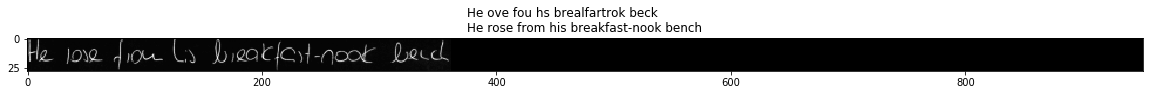

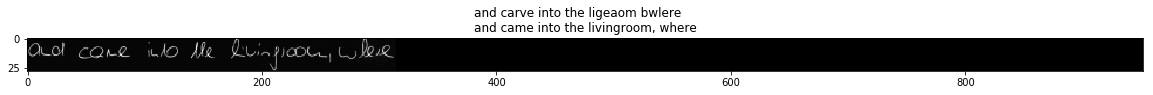

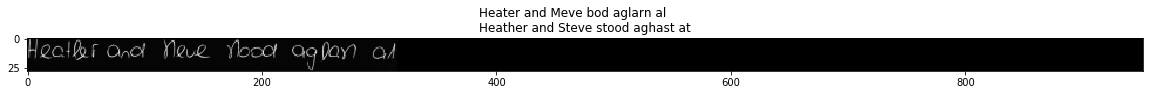

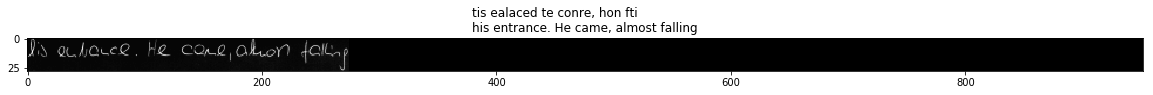

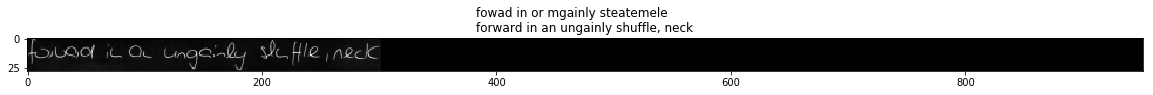

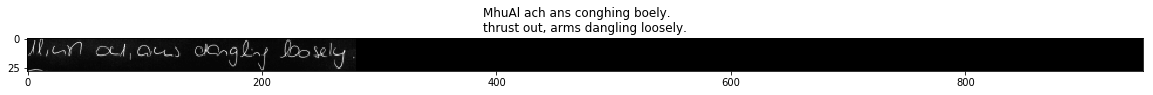

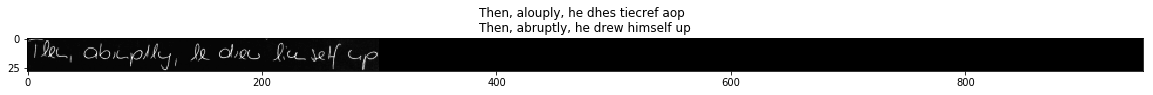

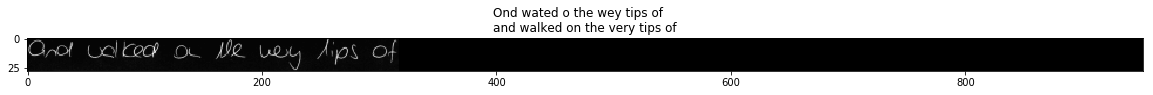

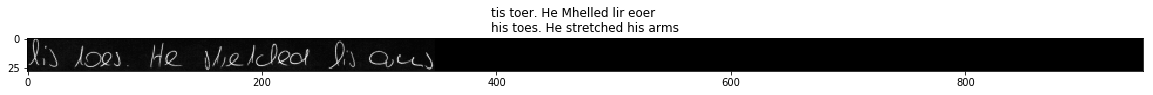

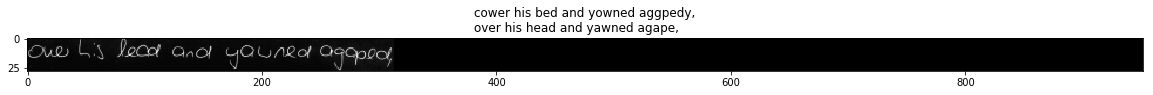

In [22]:
#lenet
# obtain one batch of test images
# get sample outputs
batch_size = 32
test_gen = test_generator(dataset, batch_size)
decoding_model = KerasModel(inputs=ctc.network.input, 
                            outputs=ctc.network.get_layer('ctc_decoded').output)
preds = decoding_model.predict_generator(test_gen, steps=1, verbose=2)
# convert output probabilities to predicted class
trues = np.argmax(dataset.y_test, axis=-1)
trues = trues[:32]
pred_strings = [''.join(dataset.mapping.get(label, '') for label in pred).strip(' |_') for pred in preds]
true_strings = [''.join(dataset.mapping.get(label, '') for label in true).strip(' |_') for true in trues]

images = dataset.x_test[:32]
# plot the images in the batch, along with predicted and true labels
for idx in np.arange(10):
    plt.figure(figsize=(20, 20))
    lbl = true_strings[idx]
    plt.title("{}\n{}".format(str(pred_strings[idx]), str(true_strings[idx])), ma='left')
    plt.imshow(images[idx], cmap='gray')

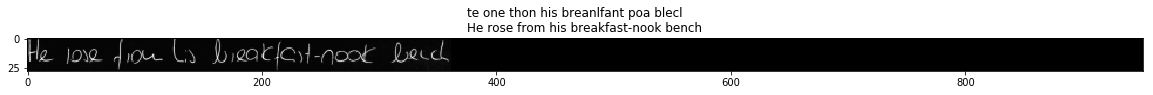

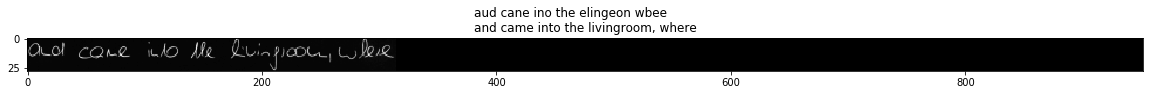

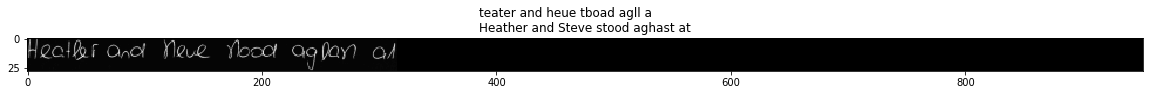

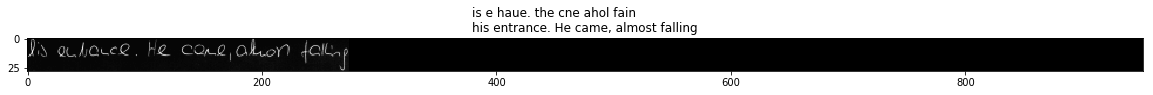

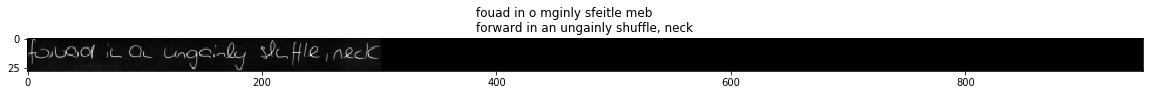

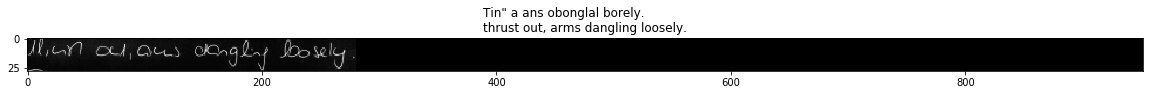

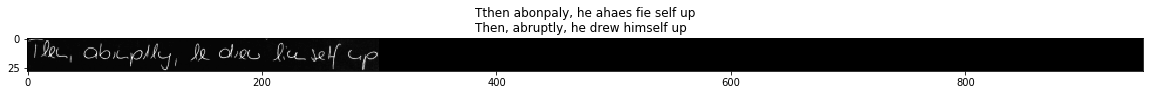

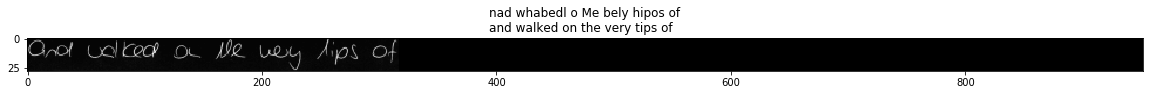

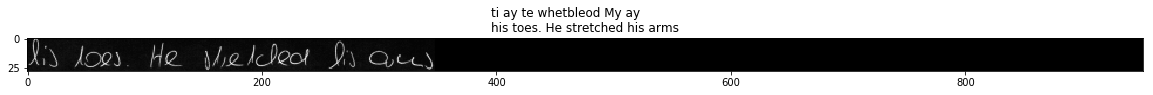

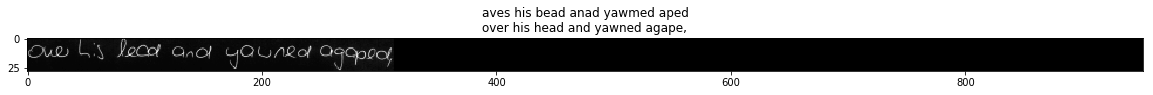

In [0]:
# custom
# obtain one batch of test images
# get sample outputs
batch_size = 32
test_gen = test_generator(dataset, batch_size)
decoding_model = KerasModel(inputs=ctc.network.input, 
                            outputs=ctc.network.get_layer('ctc_decoded').output)
preds = decoding_model.predict_generator(test_gen, steps=1, verbose=2)
# convert output probabilities to predicted class
trues = np.argmax(dataset.y_test, axis=-1)
trues = trues[:32]
pred_strings = [''.join(dataset.mapping.get(label, '') for label in pred).strip(' |_') for pred in preds]
true_strings = [''.join(dataset.mapping.get(label, '') for label in true).strip(' |_') for true in trues]

images = dataset.x_test[:32]
# plot the images in the batch, along with predicted and true labels
for idx in np.arange(10):
    plt.figure(figsize=(20, 20))
    lbl = true_strings[idx]
    plt.title("{}\n{}".format(str(pred_strings[idx]), str(true_strings[idx])), ma='left')
    plt.imshow(images[idx], cmap='gray')